# 1. 파일 읽기

In [61]:
import pandas as pd

filepath = 'data/titanic.csv'
df_titanic = pd.read_csv(filepath)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. 데이터 전처리

## 2.1 데이터 추출(Quiz)

> 데이터에는 객실등급, 성별, 나이를 label에는 생존 정보를 저장하시오

In [62]:
df_data = df_titanic[['Pclass', 'Sex', 'Age']].copy()
df_test = df_titanic[['Pclass', 'Sex', 'Age']]
df_labels = df_titanic['Survived']

In [63]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


In [64]:
df_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

> 생존에 영향을 주는 데이터는 위의 세가지

## 2.2 데이터 변환(Quiz)

> 문자열은 학습을 시킬 수 없음으로 수치데이터로 변환해야 한다.

In [65]:
id(df_data), id(df_test), id(df_titanic)

(2342955753424, 2343078421296, 2343051451840)

In [66]:
id(df_titanic.loc[0, : 'Sex'])

2343051450976

In [67]:
id(df_test.loc[0, : 'Sex'])

2343051450880

In [68]:
id(df_data.loc[0, : 'Sex'])

2343051460576

In [69]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

df_test['Sex'] = LabelEncoder().fit_transform(df_test['Sex'])

C:\Users\sungc\AppData\Local\Temp\ipykernel_16620\3557062875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Sex'] = LabelEncoder().fit_transform(df_test['Sex'])


In [70]:
df_test['Sex'].dtype

dtype('int64')

In [71]:

df_data.loc[:,'Sex'] = LabelEncoder().fit_transform(df_data['Sex'])

df_data.info()
# encoded = pd.get_dummies(data=df_data, columns=['Sex'], drop_first=True)
# df_data['Sex'] = encoded['Sex_male'].astype(np.int64)
# df_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


In [72]:
df_data['Sex'] = LabelEncoder().fit_transform(df_data['Sex'])

In [73]:
df_data['Sex'].dtype

dtype('int64')

In [74]:
df_data

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


> 기존에 문자열로 되어 있던 성별을 0, 1로 변환시켰다.

## 2.3 결측치 변환(Quiz)

> 현재 나이에 결측치가 나타나 평균나이로 변환시킬 것이다.

In [75]:
df_data.loc[:, 'Age'] = df_data['Age'].fillna(int(df_data['Age'].mean()))
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


In [76]:
df_data[['Sex', 'Age']] = df_data[['Sex', 'Age']].astype(np.int64)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  891 non-null    int64
 1   Sex     891 non-null    int64
 2   Age     891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


# 3. 모델 만들기

## 3.1 정규화

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normScaled = pd.DataFrame(scaler.fit_transform(df_data), columns=df_data.columns)
df_normScaled.describe()

,Pclass,Sex,Age
count,891.000000,891.000000,891.000000
mean,0.654321,0.647587,0.369304
std,0.418036,0.477990,0.162672
min,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.275000
50%,1.000000,1.000000,0.362500
75%,1.000000,1.000000,0.437500
max,1.000000,1.000000,1.000000


## 3.2 데이터 추출

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_normScaled, df_labels, test_size=0.3, random_state=10)

## 3.3모델 생성

In [79]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

## 3.4 성능평가

In [80]:
lr.score(X_train, y_train)

0.7768860353130016

In [81]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred = lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")

Accuracy: 0.8171641791044776
ROC_AUC: 0.7956101736365859


In [82]:
neg_mse_scores = cross_val_score(lr, df_data, df_labels, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-0.21 -0.22 -0.2  -0.22 -0.2 ]
5 folds의 개별 RMSE scores:  [0.46 0.47 0.45 0.47 0.45]
5 folds의 평균 RMSE: 0.460


In [83]:
from sklearn.model_selection import GridSearchCV

def get_best_param(C_list):
    params = {
        'penalty': ['l2'],
        'C': C_list
    }
    lr = LogisticRegression()
    grid_cv = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5)
    grid_cv.fit(df_data, df_labels)
    print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
    print('최고 예측 정확도: ', grid_cv.best_score_)

In [84]:
C_list = [0.01, 0.1, 1, 5, 10]
get_best_param(C_list)

최적 하이퍼 파라미터:  {'C': 5, 'penalty': 'l2'}
최고 예측 정확도:  0.7878789780930262


In [85]:
C_list = [2, 3, 4, 5, 6, 7, 8, 9]
get_best_param(C_list)

최적 하이퍼 파라미터:  {'C': 2, 'penalty': 'l2'}
최고 예측 정확도:  0.7878789780930262


In [86]:
lr = LogisticRegression(C=2)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")
neg_mse_scores = cross_val_score(lr, df_data, df_labels, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

Accuracy: 0.8171641791044776
ROC_AUC: 0.7956101736365859
5 folds의 개별 Negative MSE scores:  [-0.21 -0.21 -0.2  -0.22 -0.21]
5 folds의 개별 RMSE scores:  [0.46 0.46 0.45 0.47 0.46]
5 folds의 평균 RMSE: 0.460


## 3.5 회귀 계수
> 회귀 계수가 음수가 되면 데이터의 수치가 커질 수록 결과가 작은 수일 확률이 높다. 양수가 되면 데이터의 수차가 커질 수록 결과가 큰 수일 확률이 높다.

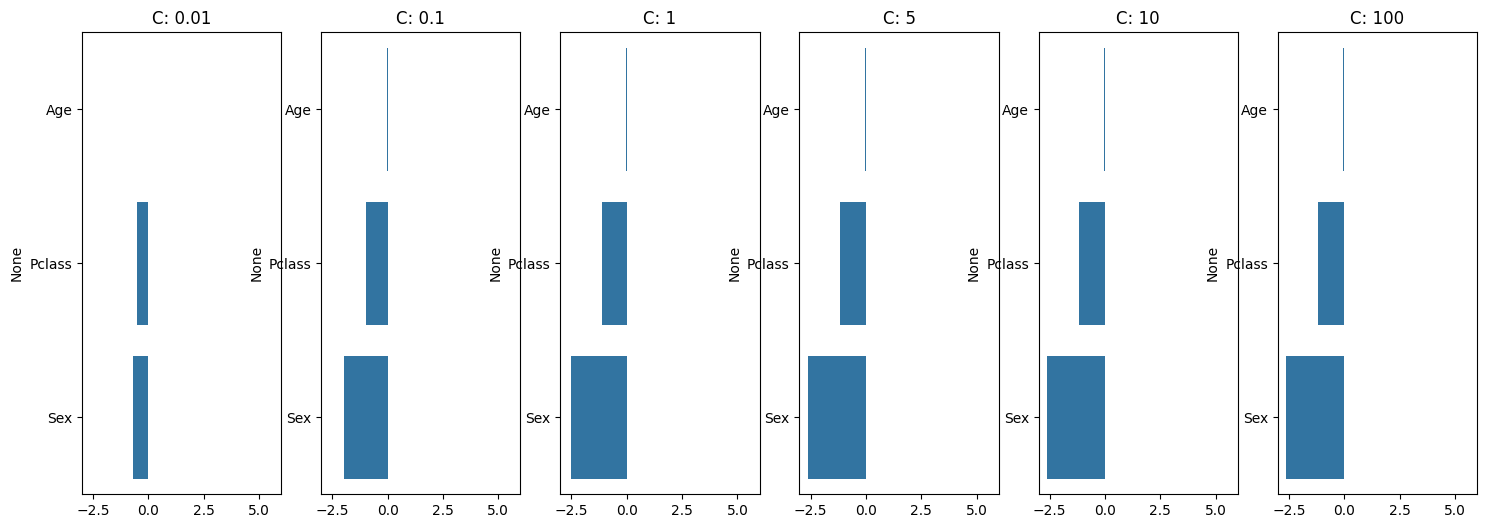

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

Cs = [0.01, 0.1, 1, 5, 10, 100]
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=6)

coeff_df = pd.DataFrame()

for pos, C in enumerate(Cs):
    lr = LogisticRegression(C=C)
    lr.fit(df_data, df_labels)
    coeff = pd.Series(data=lr.coef_[0], index=df_data.columns)
    colname = f'C: {C}'
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

> 회귀 계수가 음수가 되면 수치가 커질 수록 작은 수일 확률이 높다. 양수이면 수치가 커질수록 큰 수일 확률이 높다. 
* 첫 번째 데이터는 자리 등급으로써 음수임으로 커질수록 즉, C등급 자리일수록 작은 수일 확률 즉, 0인 죽을 확률이 높다.
* 두 번째 데이터는 성별로써 음수임으로 커질수록 즉, 1인 남자일 수록 작은 수일 확률 즉, 0인 죽을 확률이 높다.
* 세 번째 데이터는 나이로써 음수임으로 커질수록 즉, 나이가 많을수록 작은 수일 확률 즉, 0인 죽을 확률이 높다.